In [56]:
library(stats)
library(dummy)
library(tidyverse)
library(dendextend)

In [49]:
dt <- read.csv("../data/CVD_cleaned/CVD_cleaned.csv")[1:20,]
head(dt)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_.cm.,Weight_.kg.,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
2,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
3,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
4,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
5,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
6,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183,154.22,46.11,No,0,12,12,12


In [50]:
dt_num <- dt %>% select(where(is.numeric))
dt_str <- dt %>% select(where(is.character))
dt_str <- dt_str %>% dummy() %>% mutate_all(as.numeric)
dt_dummy <- cbind(dt_str,dt_num)
head(dt_dummy)

,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very.Good,Checkup_Within.the.past.2.years,Checkup_Within.the.past.year,Exercise_No,Exercise_Yes,Heart_Disease_No,...,Age_Category_80.,Smoking_History_No,Smoking_History_Yes,Height_.cm.,Weight_.kg.,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,1,0,1,0,1,0,1,...,0,0,1,150,32.66,14.54,0,30,16,12
2,0,0,0,0,1,0,1,1,0,0,...,0,1,0,165,77.11,28.29,0,30,0,4
3,0,0,0,0,1,0,1,0,1,1,...,0,1,0,163,88.45,33.47,4,12,3,16
4,0,0,0,1,0,0,1,0,1,0,...,0,1,0,180,93.44,28.73,0,30,30,8
5,0,0,1,0,0,0,1,1,0,1,...,1,0,1,191,88.45,24.37,0,8,4,0
6,0,0,1,0,0,0,1,1,0,1,...,0,1,0,183,154.22,46.11,0,12,12,12


In [51]:
dist_dt <- dist(dt_dummy,method="euclidean")
dist_dt

            1          2          3          4          5          6          7
2   52.171496                                                                  
3   64.644172  25.659852                                                       
4   70.877108  37.627948  38.436541                                            
5   75.313697  36.714602  34.173235  37.428728                                 
6  131.204034  84.460076  70.784621  68.434442  71.374509                      
7   49.913286  21.760287  30.497424  37.031989  26.355586  88.963216           
8   82.301883  35.309843  29.772958  33.097439  43.772057  52.863962  46.846773
9   48.401803  22.478890  23.265737  37.498931  33.907558  86.536380  15.286491
10  67.235986  27.175997  18.481136  32.195647  31.515114  67.671129  28.384737
11  47.148155  21.095888  32.360620  29.836387  43.907308  87.264648  25.338118
12  59.743257  40.795512  28.430677  46.952505  38.003992  86.771791  33.504765
13  64.041119  24.853670  17.425375  41.

将所有人分成4个组，所以cutree里面k填4  
生成好之后会按数据框的行的顺序生成一列vector，用mutate填进去就行了

In [52]:
hc_dt <- hclust(dist_dt,method="complete")
cluster_k4 <- cutree(hc_dt,k=4)
cluster_k4
cluster_dt <- mutate(dt,cluster=cluster_k4)
head(cluster_dt)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 1  2  2  2  2  3  2  4  2  2  2  2  2  4  1  4  2  2  4  2

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_.cm.,Weight_.kg.,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,cluster
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12,1
2,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4,2
3,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16,2
4,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8,2
5,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0,2
6,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183,154.22,46.11,No,0,12,12,12,3


正常的聚类图直接把hclust得到的结果plot就能画了

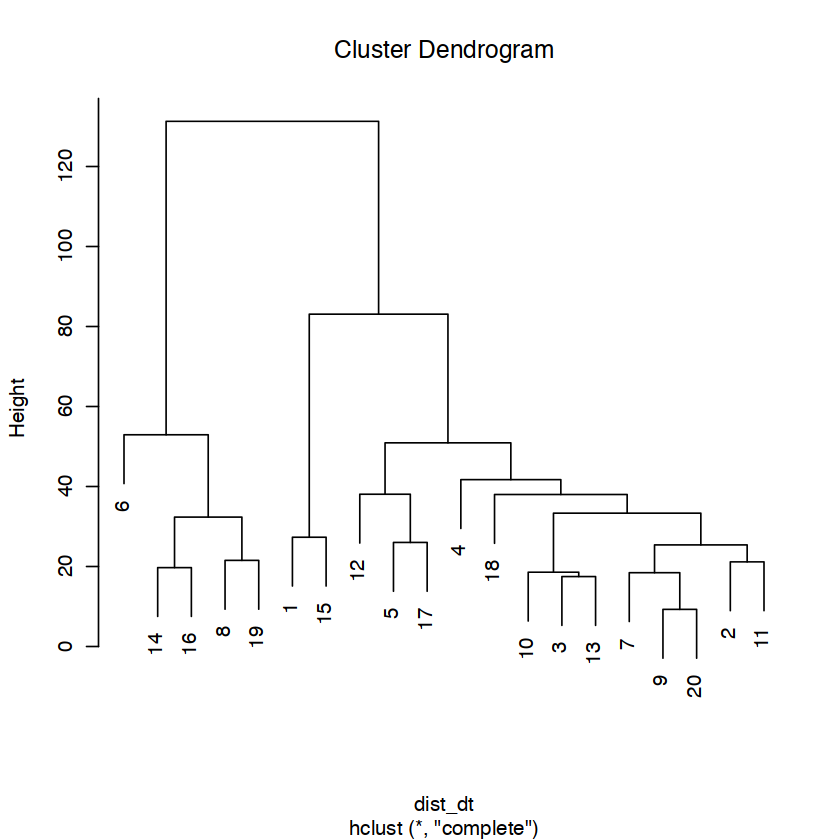

In [53]:
plot(hc_dt)

用颜色标出来的话，要用到dendextend包  
比如分成4个组的话，color_branches的k填4  
也可以指定h来分组（一般用k就行了）

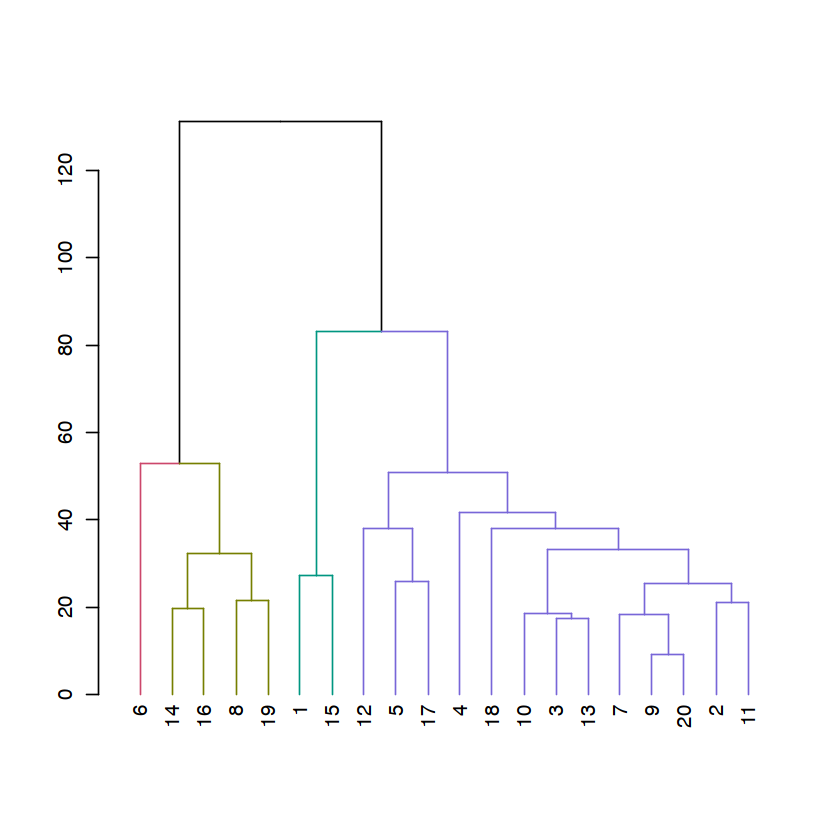

In [59]:
dend_hc_dt <- as.dendrogram(hc_dt)
colored_hc_dt <- color_branches(dend_hc_dt,k=4)
plot(colored_hc_dt)

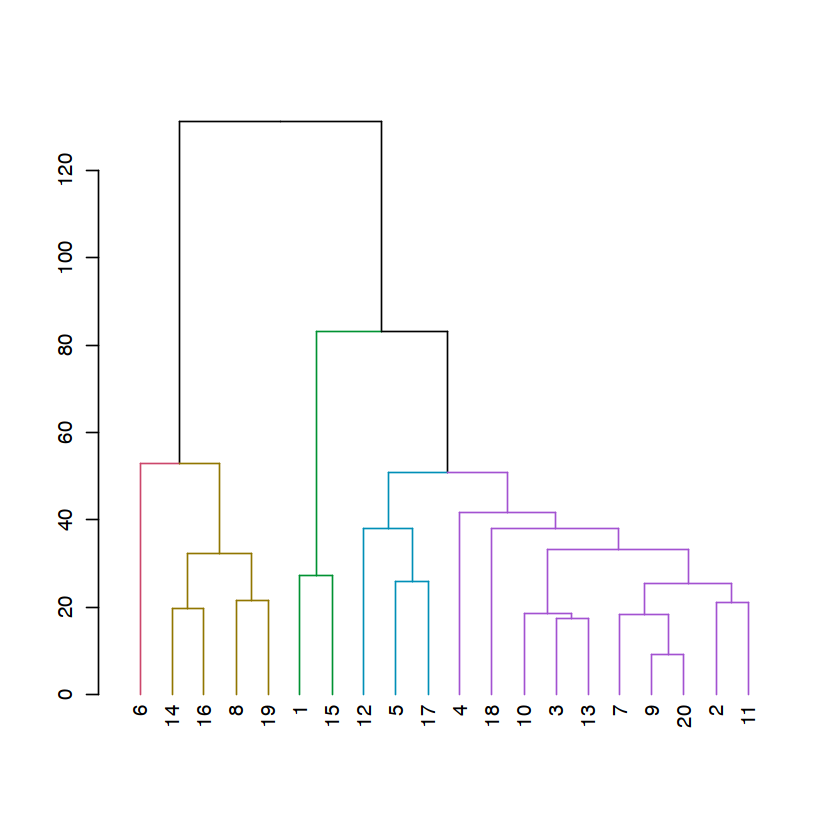

In [65]:
dend_hc_dt <- as.dendrogram(hc_dt)
colored_hc_dt <- color_branches(dend_hc_dt,h=45)
plot(colored_hc_dt)